In [2]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv",
    index_col="Country")

# Display sample data
df.head(10)

,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [4]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Australia to France
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5000 non-null   int64  
 1   Food Category              5000 non-null   object 
 2   Total Waste (Tons)         5000 non-null   float64
 3   Economic Loss (Million $)  5000 non-null   float64
 4   Avg Waste per Capita (Kg)  5000 non-null   float64
 5   Population (Million)       5000 non-null   float64
 6   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 312.5+ KB


In [6]:
# Generate summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [ ]:
#Going to need a scalar

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
#Look at Economic loss and total waste, strong correlation

In [7]:
df.columns

Index(['Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [9]:
df.drop(columns=['Economic Loss (Million $)'])

,Year,Food Category,Total Waste (Tons),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,120.19,953.05,31.91
France,2023,Beverages,33096.57,104.74,1105.47,36.06
...,...,...,...,...,...,...
France,2021,Beverages,47524.74,77.41,1087.46,39.73
Australia,2021,Beverages,32337.72,194.35,1336.32,64.83
China,2018,Meat & Seafood,20640.96,21.04,16.13,31.23


In [17]:
#Thanks chat GPT
#Define your features
numeric_features = ['Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']
binary_features = []  # You said you dropped one, so it might be empty
categorical_features = ['Year', 'Food Category']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit-transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Get the output feature names — this is KEY
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame with correct shape
df_final = pd.DataFrame(preprocessed_X_train.toarray() if hasattr(preprocessed_X_train, "toarray") else preprocessed_X_train,
                        columns=feature_names)

df_final.head()

,num__Avg Waste per Capita (Kg),num__Population (Million),num__Household Waste (%),cat__Year_2018,cat__Year_2019,cat__Year_2020,cat__Year_2021,cat__Year_2022,cat__Year_2023,cat__Year_2024,cat__Food Category_Bakery Items,cat__Food Category_Beverages,cat__Food Category_Dairy Products,cat__Food Category_Frozen Food,cat__Food Category_Fruits & Vegetables,cat__Food Category_Grains & Cereals,cat__Food Category_Meat & Seafood,cat__Food Category_Prepared Food
0,-0.708165,-1.537905,0.308676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.599429,1.111495,-1.677518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.106829,0.744097,-0.170839,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.206554,0.612273,-1.565401,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.090971,0.990950,-1.207489,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corrs = df_final.corr()
corrs

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
abs(corrs["Total Waste (Tons)"]).sort_values(ascending=False) 

In [ ]:
#Economic Loss has a strong linear correlation. 
#No other strong correlations

In [ ]:
df.columns = df.columns.str.strip()


---

### Machine Learning 

---

In [18]:
 # Step 1: Get the Data
X = df.drop(columns=["Total Waste (Tons)"])
y = df["Total Waste (Tons)"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5000, 6)
(3750, 6)
(1250, 6)


In [19]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED 

,Year,Food Category,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,
Brazil,2019,Bakery Items,42234.27,162.25,39.83,45.30
USA,2023,Frozen Food,18712.96,162.09,1231.96,42.06
Australia,2024,Dairy Products,7952.53,27.61,88.75,54.41
Japan,2019,Dairy Products,38702.18,199.40,866.88,39.90
Australia,2023,Bakery Items,12029.98,192.59,682.76,50.71


In [20]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

In [21]:
print(df.shape)

(5000, 7)


TRAIN METRICS
    R2: 0.0028900365362938274
    MSE: 197377573.8044404
    RMSE: 14049.112918773213
    MAE: 12116.44955273633
    
TEST METRICS
    R2: -0.004253456725697546
    MSE: 218350010.99726155
    RMSE: 14776.671174431052
    MAE: 12935.71762895371
    


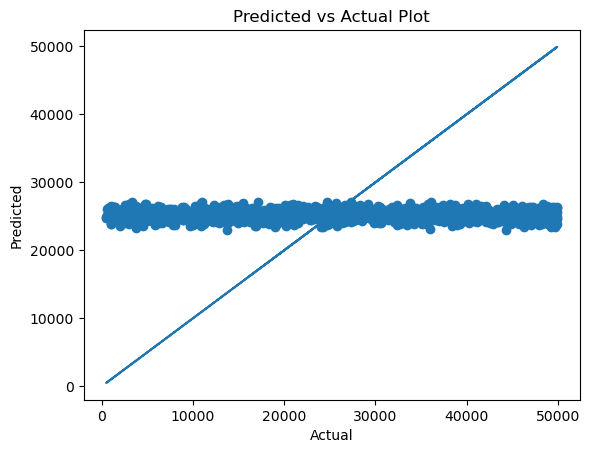

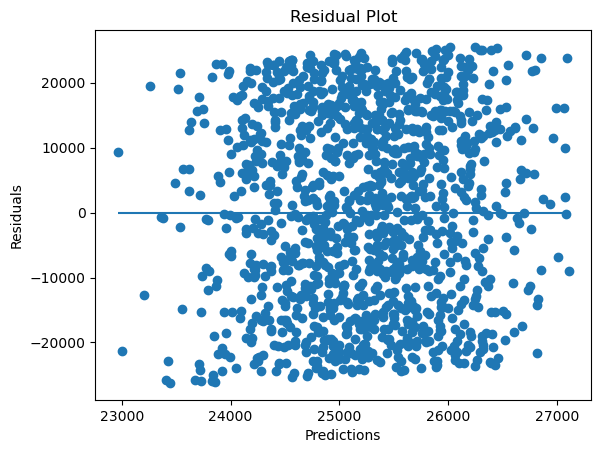

In [22]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

In [ ]:
#Pretty bad heteroscedasticy 

In [23]:
print("Columns in df:", df.columns)  # Print available columns
print("Shape of df:", df.shape)  # Check if df has data

if "Total Waste (Tons)" in df.columns:
    X = df.drop(columns=["Total Waste (Tons)", "Economic Loss (Million $)"])
    y = df["Total Waste (Tons)"]
else:
    print("❌ Error: Column 'Total Waste (Tons)' is missing!")


Columns in df: Index(['Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')
Shape of df: (5000, 7)


TRAIN METRICS
    R2: 0.8499269646671337
    MSE: 29706905.65017846
    RMSE: 5450.404173102987
    MAE: 4599.396339466666
    
TEST METRICS
    R2: -0.06543900293205618
    MSE: 231653290.7595148
    RMSE: 15220.160667992792
    MAE: 13209.18582064
    


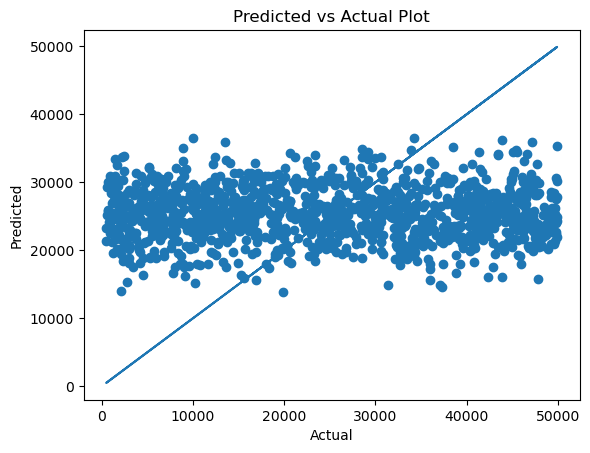

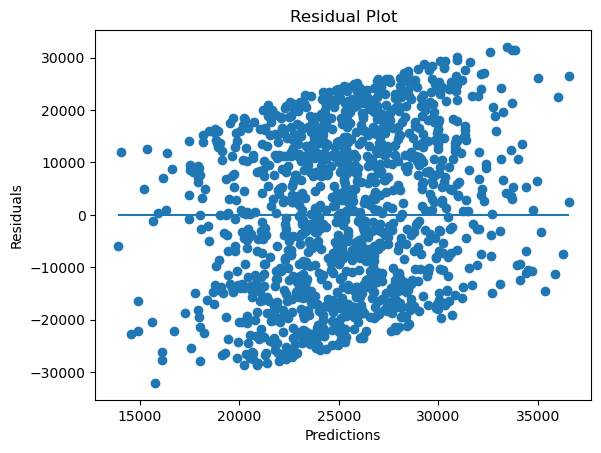

In [24]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)


In [25]:
fi = pd.DataFrame(list(zip(X.columns, rf.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Year,0.253466
2,Avg Waste per Capita (Kg),0.248861
1,Food Category,0.246563
3,Population (Million),0.016609
4,Household Waste (%),0.016046
